In [1]:
import pandas as pd
import numpy as np

In [2]:
farm_data_master=pd.read_csv(r"E:\phd\farm_data.csv")
train_data_master=pd.read_csv(r"E:\phd\train_data.csv")
train_weather_master=pd.read_csv(r"E:\phd\train_weather.csv")

In [3]:
temp_location_list=[]
temp_timestamp_list=[]
for i in train_weather_master.deidentified_location.unique():
    for j in pd.date_range('2016-01-01 00:00:00', periods=8784, freq='H'):
        temp_timestamp_list.append(j)
        temp_location_list.append(i)

new_train_weather_master=pd.DataFrame(columns=['timestamp', 'deidentified_location'])
new_train_weather_master.timestamp=pd.Series(temp_timestamp_list)
new_train_weather_master.deidentified_location=pd.Series(temp_location_list)

In [5]:
train_weather_master.timestamp=train_weather_master.timestamp.astype('datetime64[ns]')

In [6]:
test_merge=pd.merge(train_weather_master, new_train_weather_master, on=['timestamp', 'deidentified_location'], how='outer')
test_merge=test_merge.sort_values(by=['deidentified_location','timestamp']).reset_index(drop=True)

In [7]:
test_merge.to_csv(r"E:\phd\Train_weather_final.csv")

In [9]:
train_data_master.rename(columns={'date':'timestamp'},inplace=True)
train_data_master.timestamp=train_data_master.timestamp.astype('datetime64[ns]')

In [27]:
new_farm_data_master=farm_data_master.copy()
new_farm_data_master.drop([1076,537,510,634,705,574,360,678,1300,178,822,679,287,325,395],axis=0,inplace=True)
new_farm_data_master.reset_index(drop=True)

,farm_id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location
0,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369
1,fid_90053,2004.0,NaN,252.696160,Obery Farms,location 7369
2,fid_17537,1991.0,NaN,499.446528,Obery Farms,location 7369
3,fid_110392,2002.0,NaN,2200.407555,Obery Farms,location 7369
4,fid_62402,1975.0,NaN,10833.140121,Obery Farms,location 7369
...,...,...,...,...,...,...
1429,fid_41664,1914.0,NaN,1822.663957,Sanderson Farms,location 5150
1430,fid_14529,NaN,NaN,399.297094,Obery Farms,location 5150
1431,fid_46454,1997.0,NaN,1046.552295,Sanderson Farms,location 5150
1432,fid_24103,2001.0,NaN,2766.186825,Dole Food Company,location 5150


In [28]:
new_farm_data_master

,farm_id,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location
0,fid_110884,2008.0,NaN,690.455096,Obery Farms,location 7369
1,fid_90053,2004.0,NaN,252.696160,Obery Farms,location 7369
2,fid_17537,1991.0,NaN,499.446528,Obery Farms,location 7369
3,fid_110392,2002.0,NaN,2200.407555,Obery Farms,location 7369
4,fid_62402,1975.0,NaN,10833.140121,Obery Farms,location 7369
...,...,...,...,...,...,...
1444,fid_41664,1914.0,NaN,1822.663957,Sanderson Farms,location 5150
1445,fid_14529,NaN,NaN,399.297094,Obery Farms,location 5150
1446,fid_46454,1997.0,NaN,1046.552295,Sanderson Farms,location 5150
1447,fid_24103,2001.0,NaN,2766.186825,Dole Food Company,location 5150


In [29]:
train_farm_ids=train_data_master.farm_id.unique()

In [30]:
framdata_farm_ids=new_farm_data_master.farm_id.unique()

In [31]:
framdata_farm_ids.size

1434

In [34]:
new_farm_data_master.to_csv(r"E:\phd\new_farm_data.csv")

In [40]:
merge_1_farmdata_traindata=pd.merge(train_data_master, new_farm_data_master, on=['farm_id'], how='left')

In [41]:
final_merge_farm_data_left=pd.merge(merge_1_farmdata_traindata, test_merge, on=['timestamp', 'deidentified_location'], how='inner')

In [42]:
final_merge_farm_data_left.to_csv(r"E:\phd\Final_merge.csv")

In [43]:
final_merge_farm_data_left

,timestamp,farm_id,ingredient_type,yield,operations_commencing_year,num_processing_plants,farm_area,farming_company,deidentified_location,temp_obs,cloudiness,wind_direction,dew_temp,pressure_sea_level,precipitation,wind_speed
0,2016-01-01 00:00:00,fid_110884,ing_w,0.000,2008.0,NaN,690.455096,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
1,2016-01-01 00:00:00,fid_90053,ing_w,0.000,2004.0,NaN,252.696160,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
2,2016-01-01 00:00:00,fid_17537,ing_w,0.000,1991.0,NaN,499.446528,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
3,2016-01-01 00:00:00,fid_110392,ing_w,0.000,2002.0,NaN,2200.407555,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
4,2016-01-01 00:00:00,fid_62402,ing_w,0.000,1975.0,NaN,10833.140121,Obery Farms,location 7369,25.0,6.0,0.0,20.0,1019.7,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20216095,2016-12-31 23:00:00,fid_46846,ing_x,0.000,NaN,NaN,8101.141600,Wayne Farms,location 5410,6.1,NaN,190.0,-6.7,1012.4,-1.0,9.8
20216096,2016-12-31 23:00:00,fid_46846,ing_z,1909.330,NaN,NaN,8101.141600,Wayne Farms,location 5410,6.1,NaN,190.0,-6.7,1012.4,-1.0,9.8
20216097,2016-12-31 23:00:00,fid_26870,ing_w,14.000,NaN,NaN,7867.769264,Sanderson Farms,location 5410,6.1,NaN,190.0,-6.7,1012.4,-1.0,9.8
20216098,2016-12-31 23:00:00,fid_26870,ing_x,0.000,NaN,NaN,7867.769264,Sanderson Farms,location 5410,6.1,NaN,190.0,-6.7,1012.4,-1.0,9.8


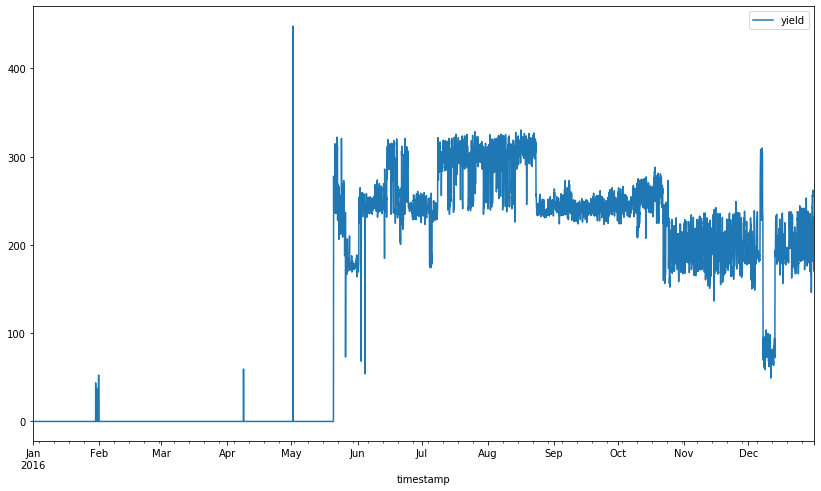

In [54]:
%matplotlib inline
final_merge_farm_data_left[final_merge_farm_data_left["farm_id"]=="fid_110884"][['timestamp','yield']].set_index("timestamp").plot(figsize=(14,8))